A liga ternária mais cara do mundo
========================================



## Introdução



Para esse problema, consideramos que uma liga ternária é um material formado por três elementos e a quantidade de cada elemento em massa, de forma que a massa total é 100g. Além disso consideramos que a massa de cada elemento na liga é pelo menos 5g. Cada elemento possui um preço por massa, então o preço da liga é a soma da massa de cada elemento multiplicada pelo seu respectivo preço. Para a resolução do problema, escreveremos as ligas na forma de dicionário, por exemplo:

liga = {'Ba': 10.6, 'Am': 34.4, 'Ho': 55.0}

## Objetivo



O objetivo do experimento é escrever um algoritmo genético para encontrar a liga ternária mais cara possível. Os elementos possíveis e seus respectivos preços estão armazenados em um dicionário no arquivo constantes.py

## Importações



In [1]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from funcoes import populacao_inicial_liga
from funcoes import funcao_objetivo_pop_liga
from funcoes import selecao_torneio_max
from funcoes import cruzamento_liga as funcao_cruzamento
from funcoes import mutacao_elemento_liga 
from funcoes import mutacao_quantidades_liga
from funcoes import preco_liga
import constantes

## Códigos e discussão



In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 100
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3
NUM_GERACOES = 200

# relacionadas ao problema a ser resulvido
PRECO = constantes.PRECO
ELEMENTOS = list(PRECO.keys())
NUM_GENES = 3

In [3]:
# funções locais (para não ter que colocar as variaveis locais no script)

def cria_populacao_inicial(tamanho, tamanho_liga):
    return populacao_inicial_liga(tamanho, tamanho_liga, ELEMENTOS)

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_liga(populacao, PRECO)

def funcao_selecao(populacao, fitness):
    return selecao_torneio_max(populacao, fitness, NUM_COMBATENTES_NO_TORNEIO)

def mutacao(individuo):
    return mutacao_elemento_liga(individuo,ELEMENTOS)

Progresso da liga mais cara já vista:
{'Ca': 25.90541153498824, 'Po': 41.11692242359876, 'Ru': 32.977666041413} - fitness: 2022952583590.683
{'Ru': 28.162505199512132, 'Ca': 10.80358341321883, 'Po': 61.033911387269036} - fitness: 3002868440552.1846
{'Ac': 51.14577761616847, 'Po': 42.645850738575334, 'Nb': 6.208371645256189} - fitness: 3581403407207.323
{'As': 11.952058019597501, 'Ac': 19.3410890803784, 'Po': 68.7068529000241} - fitness: 3941268746012.1753
{'Po': 64.09550603588289, 'Ir': 8.328161198307955, 'Ac': 27.576332765809155} - fitness: 3953212547641.9463
{'Ac': 12.604182620116047, 'Po': 78.07434757917333, 'Pd': 9.321469800710629} - fitness: 4206779197340.106
{'Ac': 12.604182620116047, 'Po': 78.07434757917333, 'Ir': 9.321469800710629} - fitness: 4206779197402.56
{'Ac': 14.955913163638511, 'Po': 79.08715570888809, 'Ir': 5.956931127473394} - fitness: 4324809542957.59
{'Ac': 14.955913163638511, 'Po': 79.08715570888809, 'Pa': 5.956931127473394} - fitness: 4324809544290.7515
{'Ac': 11.

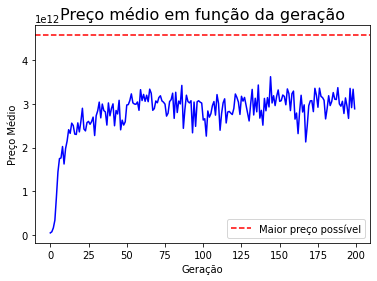

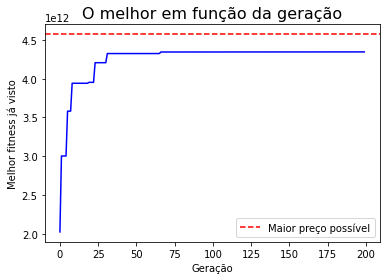

In [4]:
populacao = cria_populacao_inicial(TAMANHO_POP, NUM_GENES)

melhor_fitness_ja_visto = 0

print("Progresso da liga mais cara já vista:")

lista_fitness_medio = []
lista_melhor_fitness = []
for _ in range(NUM_GERACOES):
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    fitness_medio = np.average(fitness)
    lista_fitness_medio.append(fitness_medio)
    populacao = funcao_selecao(populacao, fitness)

    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]

    contador = 0

    for pai, mae in zip(pais, maes):
        if rd.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        contador = contador + 2
    # Mutação
    for n in range(len(populacao)):
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = mutacao_quantidades_liga(individuo)
    for n in range(len(populacao)):
        if rd.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = mutacao(individuo)
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = max(fitness)
    if maior_fitness > melhor_fitness_ja_visto:
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness
        print(melhor_individuo_ja_visto, "- fitness:", melhor_fitness_ja_visto)
    lista_melhor_fitness.append(melhor_fitness_ja_visto)
print()
print("Liga mais cara já encontrada:")
print(melhor_individuo_ja_visto)
print()

fig, ax1 = plt.subplots(1, 1)
ax1.plot(range(len(lista_fitness_medio)), lista_fitness_medio, c="b")
ax1.axhline(y=4573925000000.0, c="r", linestyle="--", label="Maior preço possível")
ax1.set_xlabel("Geração")
ax1.set_ylabel("Preço Médio")
ax1.set_title("Preço médio em função da geração", fontsize=16)
ax1.legend()

fig, ax2 = plt.subplots(1, 1)
ax2.plot(range(len(lista_melhor_fitness)), lista_melhor_fitness, c="b")
ax2.axhline(y=4573925000000.0, c="r", linestyle="--", label="Maior preço possível")
ax2.set_xlabel("Geração")
ax2.set_ylabel("Melhor fitness já visto")
ax2.set_title("O melhor em função da geração", fontsize=16)
ax2.legend()

## Conclusão



Concluo que o algoritmo foi muito eficiente para maximizar o preço da liga ternária. Observamos que o algoritmo chega muito próximo do valor máximo em menos de 50 gerações